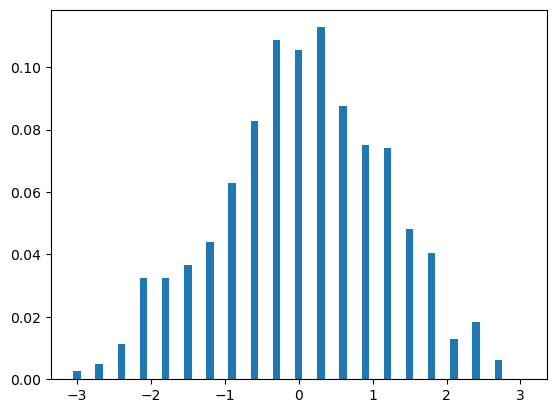

In [13]:
import torch
import pytorch_measure as pm

data = torch.randn(1000)
l = [-3.5, 3.5]
def loss_fn(w):
    # Funkar inte riktigt
    log_prob = 0
    for y in data:
        # Remap y from l to range(len(w))
        i = round((y.item() - l[0]) * (len(w) - 1) / (l[1] - l[0]))
        log_prob += torch.log(w[i])
    return -log_prob

def test_step():
    w = torch.softmax(torch.rand(21), dim=0)
    l = torch.linspace(-3,3,21)
    measure = pm.PytorchMeasure(l, w)
    for epoch in range(3000):
        measure.step(loss_fn, 0.01)
    measure.visualize()

test_step()

